In [8]:
import os
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy
#import scipy.optimize
import pandas as pd
import lmfit
#import re

In [3]:
#Gaussian parameters derived from ImageJ
'''Formula: y = a + (b-a)*exp(-(x-c)*(x-c)/(2*d*d))
Macro code: y = a+(b-a)*Math.exp(-(x-c)*(x-c)/(2*d*d))
Status: Success
Number of completed minimizations: 2
Number of iterations: 76 (max: 6000)
Time: 1 ms
Sum of residuals squared: 0.00043708
Standard deviation: 0.0060352
R^2: 0.99843
Parameters:
	a = 0.52031
	b = 0.93873
	c = 5.25950
	d = 1.57011
std_dev = .0060352
mean = 6.5
x_min = 0
x_max = 12
num_points = 13'''


'Formula: y = a + (b-a)*exp(-(x-c)*(x-c)/(2*d*d))\nMacro code: y = a+(b-a)*Math.exp(-(x-c)*(x-c)/(2*d*d))\nStatus: Success\nNumber of completed minimizations: 2\nNumber of iterations: 76 (max: 6000)\nTime: 1 ms\nSum of residuals squared: 0.00043708\nStandard deviation: 0.0060352\nR^2: 0.99843\nParameters:\n\ta = 0.52031\n\tb = 0.93873\n\tc = 5.25950\n\td = 1.57011\nstd_dev = .0060352\nmean = 6.5\nx_min = 0\nx_max = 12\nnum_points = 13'

In [9]:
data_path = '/SNS/VENUS/IPTS-35945/shared/images_normalized/Gd Mask Normalization' 
assert os.path.exists(data_path)

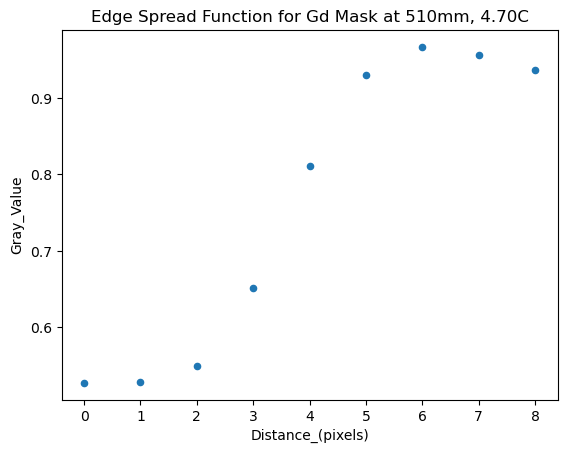

In [10]:
#Pulls data from ImageJ flux histogram, shows the edge spread function (ESF)
df = pd.read_csv ('/SNS/VENUS/IPTS-35945/shared/images_normalized/Gd Mask Normalization/normalized_sample_7998_obs_8015/NewESFforFWHM1022JUN1825.csv')
#run_7998_data = np.loadtxt(data_path, '/normalized_sample_7998_obs_8015/EdgeSpreadFunction', delimiter= ',')
#x = df[:,0]
#y = df[:,1]
plot = df.plot(x='Distance_(pixels)',y='Gray_Value', kind="scatter", title="Edge Spread Function for Gd Mask at 510mm, 4.70C")

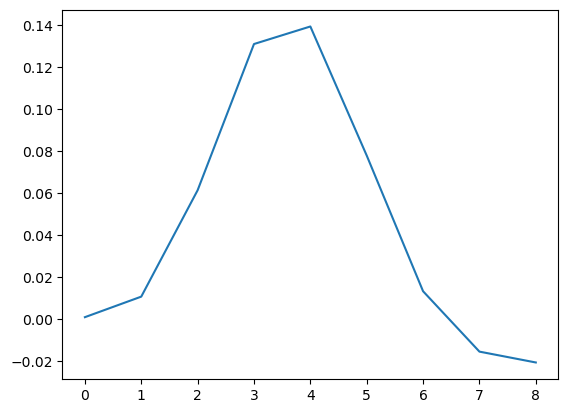

In [ ]:
#Derives line spread function (LSF) from edge spread function (ESF)
#dydx = np.gradient(df['Gray Value'], df['Distance (pixels)'])
#x = df[:,0]
#y = df[:,1]
#df.shape
df1 = df["Gray_Value"] #takes in df (2D) and selects a single dimension (gray values) to differentiate over
'''dp = savgol (df1, 9, 3, 1) #2nd order approximation to find derivative (4th value set at 1)
dp.shape'''
#filter does not work as fitting regime for data reduction with this few points (9)
#numpy.gradient method for determining derivative function for the LSF curve
dydxdf = np.gradient(df1, 1)
plt.plot(dydxdf)


In [16]:
print (dydxdf)
from numpy import loadtxt
from lmfit.models import GaussianModel
x = dydxdf[0]
y = dydxdf[1]
mod = GaussianModel()
pars = mod.guess(y, x=x)
out = mod.fit(y,pars, x=x )
print (out.fit_report(min_correl=.25))

[ 0.000924   0.0107115  0.0613815  0.1310355  0.1393915  0.077922
  0.013277  -0.015484  -0.020654 ]


IndexError: invalid index to scalar variable.

NameError: name 'savgol' is not defined

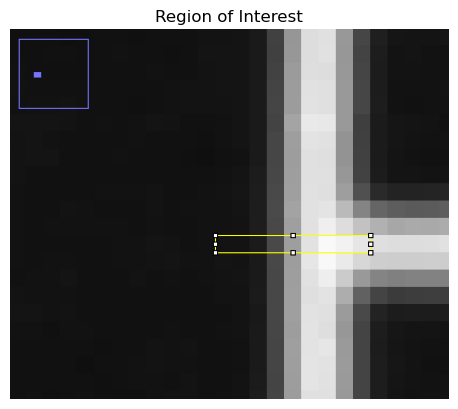

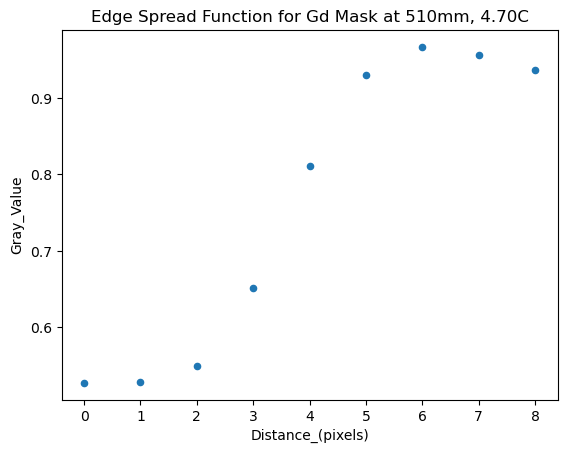

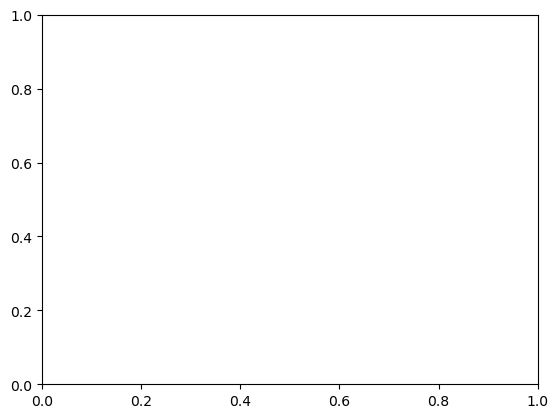

In [10]:
img1 = mpimg.imread(data_path+"/normalized_sample_7998_obs_8015/The edge for FWHM test.png")
plt.axis('off')
plt.title ('Region of Interest')
plt.imshow(img1)
plot1 = df.plot(x='Distance_(pixels)',y='Gray_Value', kind="scatter", title="Edge Spread Function for Gd Mask at 510mm, 4.70C")
fig,ax = plt.subplots(1,1)
#ax=ax.ravel()
ax.plot(savgol (df1, 9, 3, 1))
ax.set_title('Line spread function for region of interest')
#plot2 = dp.plot ()
from scipy.optimize import curve_fit
print (dp)
'''define parabola (x, a, b, c)
    return a * x**2 + b*x + c'''
